# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [43]:
import re
import string
from wordcloud import WordCloud
import zipfile

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [45]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [46]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Four very pleasant, on time..."
1,Not Verified | We travel extensively over 25...
2,✅ Trip Verified | Flight delayed an hour due ...
3,✅ Trip Verified | A very full flight made Pre...
4,✅ Trip Verified | The worst airline I’ve ever ...


In [47]:
df.to_csv("df.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [49]:
df.head()

,reviews
0,"✅ Trip Verified | Four very pleasant, on time..."
1,Not Verified | We travel extensively over 25...
2,✅ Trip Verified | Flight delayed an hour due ...
3,✅ Trip Verified | A very full flight made Pre...
4,✅ Trip Verified | The worst airline I’ve ever ...


### TASK 2: Data Cleaning

In [50]:
import pandas as pd



# Remove the comma from the name column
df['reviews'] = df['reviews'].str.replace('Trip Verified', '')

print(df)

                                               reviews
0    ✅  |  Four very pleasant, on time flights with...
1    Not Verified |   We travel extensively over 25...
2    ✅  |  Flight delayed an hour due to bad weathe...
3    ✅  |  A very full flight made Premium Economy ...
4    ✅  | The worst airline I’ve ever flown. Could ...
..                                                 ...
995  ✅  | I was seated right next to the galley and...
996  ✅  |  Flight was OK, minor delay didn't both m...
997  ✅  |  \r\nGatwick to Barbados return. I normal...
998  ✅  |  Marseille to London. I am generally anno...
999  ✅  |  The cabin crew on flight BA035 London to...

[1000 rows x 1 columns]


In [51]:

# Remove the comma from the name column
df['reviews'] = df['reviews'].str.replace('✅', '')

print(df)

                                               reviews
0      |  Four very pleasant, on time flights with ...
1    Not Verified |   We travel extensively over 25...
2      |  Flight delayed an hour due to bad weather...
3      |  A very full flight made Premium Economy f...
4      | The worst airline I’ve ever flown. Could n...
..                                                 ...
995    | I was seated right next to the galley and ...
996    |  Flight was OK, minor delay didn't both me...
997    |  \r\nGatwick to Barbados return. I normall...
998    |  Marseille to London. I am generally annoy...
999    |  The cabin crew on flight BA035 London to ...

[1000 rows x 1 columns]


In [52]:

# Remove the comma from the name column
df['reviews'] = df['reviews'].str.replace('| ', '')

print(df)

                                               reviews
0       Four very pleasant, on time flights with fr...
1    Not Verified   We travel extensively over 25 y...
2       Flight delayed an hour due to bad weather a...
3       A very full flight made Premium Economy fee...
4      The worst airline I’ve ever flown. Could not...
..                                                 ...
995    I was seated right next to the galley and la...
996     Flight was OK, minor delay didn't both me. ...
997     \r\nGatwick to Barbados return. I normally ...
998     Marseille to London. I am generally annoyed...
999     The cabin crew on flight BA035 London to Ch...

[1000 rows x 1 columns]


Remove HTML tags, URLs, and non-alphanumeric characters from the reviews. We do that with the help of the remove_tags function, and Regex functions are used for easy string manipulation

In [53]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

We also need to remove stopwords from the corpus. Commonly used words like ‘and’, ‘the’, and ‘at’ are stopwords that do not add any special meaning or significance to a sentence. NLTK provides a list of stopwords, and you can remove them from the corpus using the following code

In [54]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We did not perform perform lemmatization on the text as the dataset was not too much otherwise I would have done it. Lemmatization is a useful technique in NLP to obtain the root form of words, known as lemmas. For example, the words “reading,” “reads,” and “read” all lemma to “read.” This approach saves unnecessary computational overhead in deciphering entire words, as their meanings are well-expressed by their lemmas. We perform lemmatization using the WordNetLemmatizer() from nltk. The text is first broken into words using the WhitespaceTokenizer() from nltk. We write a function lemmatize_text to perform lemmatization on the individual tokens.

In [55]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
df['reviews'] = df['reviews'].apply(tokens)
df.head()

,reviews
0,four pleasant time flights friendly helpful st...
1,not verified we travel extensively years tend ...
2,flight delayed hour due bad weather around jfk...
3,a full flight made premium economy feel little...
4,the worst airline i ve ever flown could check ...


To change from unlabelled to labelled dataset:

 I'll propose the sentence or tweet in this context to be analysed for polarity. This can be done using the textblob library. It can be installed as pip install -U textblob. Once the text data polarity is found, it can be assigned as a separate column in the dataframe. Subsequently, the sentence polarity can then be used for further analysis.

In [57]:
from textblob import TextBlob
df['sentiment'] = df['reviews'].apply(lambda Tweet: TextBlob(Tweet).sentiment)
print(df)

                                               reviews  \
0    four pleasant time flights friendly helpful st...   
1    not verified we travel extensively years tend ...   
2    flight delayed hour due bad weather around jfk...   
3    a full flight made premium economy feel little...   
4    the worst airline i ve ever flown could check ...   
..                                                 ...   
995  i seated right next galley lavatory aisle duri...   
996  flight ok minor delay me what astonishing wait...   
997  gatwick barbados return i normally travel ba l...   
998  marseille london i generally annoyed quality s...   
999  the cabin crew flight ba london chennai effici...   

                                      sentiment  
0                (0.221875, 0.7333333333333334)  
1    (0.09621031746031748, 0.39240638990638993)  
2    (-0.06722222222222218, 0.5248765432098766)  
3    (0.11541666666666665, 0.46833333333333327)  
4                        (-0.1078125, 0.509375)  
.. 

In [58]:
df1=pd.DataFrame(df['sentiment'].tolist(), index= df.index)

From the sentiment column (in the above output), we can see the sentiment column is categorized between two — Polarity and Subjectivity.

Polarity is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment.

Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.

Notice, the sentiment column is a tuple. So we can split it into two columns like, df1=pd.DataFrame(df['sentiment'].tolist(), index= df.index). Now, we can create a new dataframe to which I'll append the split columns as shown;

In [59]:
df_new = df
df_new['polarity'] = df1['polarity']
df_new.polarity = df1.polarity.astype(float)
df_new['subjectivity'] = df1['subjectivity']
df_new.subjectivity = df1.polarity.astype(float)

*Finally*, based on the sentence polarity found earlier, we can now add a label to the dataframe, which will indicate if the review is positive, negative or neutral.

In [60]:
import numpy as np
conditionList = [
    df_new['polarity'] == 0,
    df_new['polarity'] > 0,
    df_new['polarity'] < 0]
choiceList = ['neutral', 'positive', 'negative']
df_new['label'] = np.select(conditionList, choiceList, default='no_label')
print(df_new)


                                               reviews  \
0    four pleasant time flights friendly helpful st...   
1    not verified we travel extensively years tend ...   
2    flight delayed hour due bad weather around jfk...   
3    a full flight made premium economy feel little...   
4    the worst airline i ve ever flown could check ...   
..                                                 ...   
995  i seated right next galley lavatory aisle duri...   
996  flight ok minor delay me what astonishing wait...   
997  gatwick barbados return i normally travel ba l...   
998  marseille london i generally annoyed quality s...   
999  the cabin crew flight ba london chennai effici...   

                                      sentiment  polarity  subjectivity  \
0                (0.221875, 0.7333333333333334)  0.221875      0.221875   
1    (0.09621031746031748, 0.39240638990638993)  0.096210      0.096210   
2    (-0.06722222222222218, 0.5248765432098766) -0.067222     -0.067222   
3  

In [61]:
df_labelled = df.drop(columns=['sentiment', 'polarity', 'subjectivity'])
print(df_labelled)

                                               reviews     label
0    four pleasant time flights friendly helpful st...  positive
1    not verified we travel extensively years tend ...  positive
2    flight delayed hour due bad weather around jfk...  negative
3    a full flight made premium economy feel little...  positive
4    the worst airline i ve ever flown could check ...  negative
..                                                 ...       ...
995  i seated right next galley lavatory aisle duri...  positive
996  flight ok minor delay me what astonishing wait...  positive
997  gatwick barbados return i normally travel ba l...  positive
998  marseille london i generally annoyed quality s...  positive
999  the cabin crew flight ba london chennai effici...  positive

[1000 rows x 2 columns]


**Sentiments Visualisation**



In [62]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Proportion Sentiments')

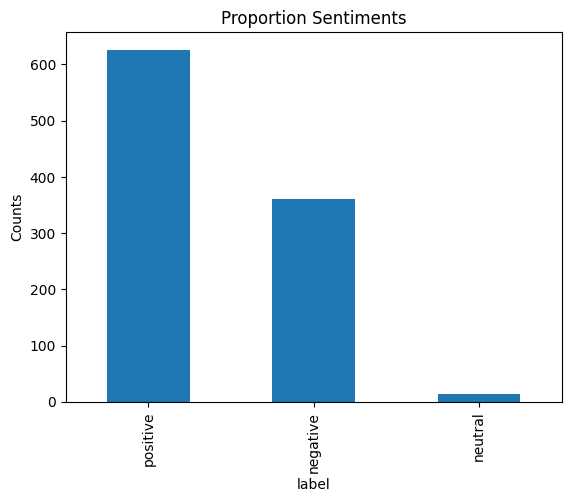

In [63]:
df_labelled["label"].value_counts().plot(kind='bar')
plt.xlabel("label")
plt.ylabel("Counts")
plt.title("Proportion Sentiments")

**Finding most comment words in the postive sentiments using wordcloud**

In [64]:
positive = df_labelled[df_labelled .label== 'positive']
negative = df_labelled[df_labelled .label== 'negative']
positive.head()


,reviews,label
0,four pleasant time flights friendly helpful st...,positive
1,not verified we travel extensively years tend ...,positive
3,a full flight made premium economy feel little...,positive
5,i surprised able give favourable review flight...,positive
6,flew british airways ba london heathrow amster...,positive


In [65]:
negative.head()

,reviews,label
2,flight delayed hour due bad weather around jfk...,negative
4,the worst airline i ve ever flown could check ...,negative
7,ba cancelled flight tokyo lhr i booked next da...,negative
8,i strongly advise everyone never fly british a...,negative
10,not verified we premium economy return flight ...,negative


In [66]:
positive_words =[]

for review in positive.reviews:
    positive_words.append(review)
positive_words = ' '.join(positive_words)
positive_words[:500]

'four pleasant time flights friendly helpful staff the guy lhr sfo leg exceptional i regret i forgotten name only negative food sfo lhr leg the advertised filet steak akin stewing steak inedible sadly occasion i food us uk flights sub standard otherwise happy recommend ba not verified we travel extensively years tend use ba regular trips possible recent years overall good service however recently experienced flight delays operational issues flight cancellations poor check in experiences etc on la'

In [67]:
negative_words = []

for review in negative.reviews:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:500]

'flight delayed hour due bad weather around jfk however made flight delayed weather lhr spending extra hour american ba lounge jfk ideal cold environment cold staff indifferent travellers needs one area exceptionally dirty plates tables napkins strewn floor waited drink one serve played game find chips crisps hidden table dark corner one areas this crazy expensive route business class feels like rip across airlines however quality ba s business class much improved introduction suites the privacy '

**Common Positive Words in the Review**

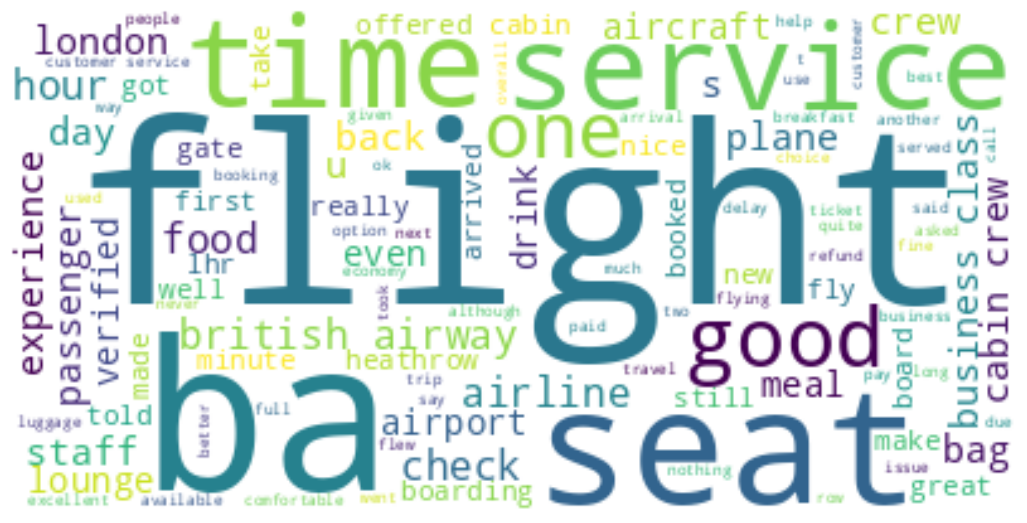

In [68]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Common Negative Words in the Review**

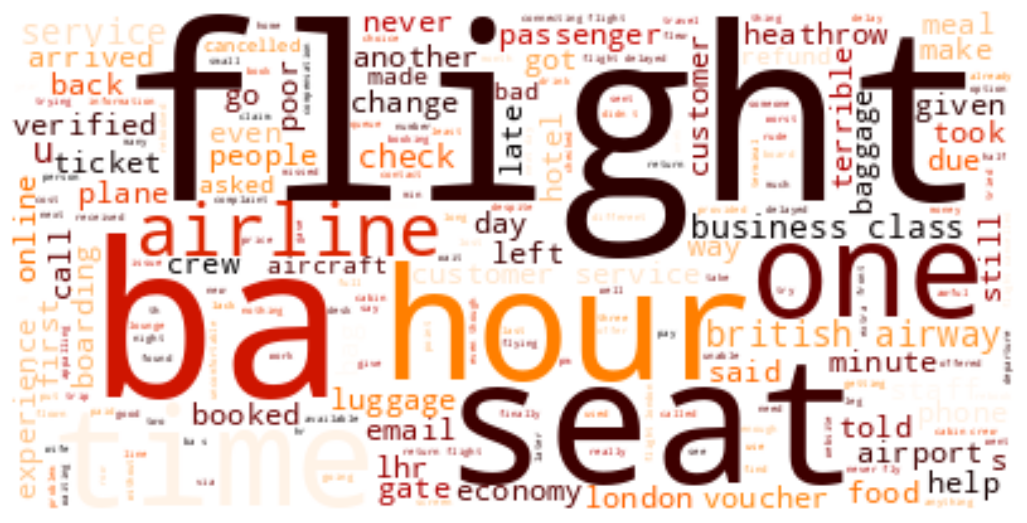

In [69]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [70]:
df_labelled['category_id'] = df_labelled['label'].factorize()[0]
from io import StringIO
category_id_df = df_labelled[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)


In [71]:
df_labelled

,reviews,label,category_id
0,four pleasant time flights friendly helpful st...,positive,0
1,not verified we travel extensively years tend ...,positive,0
2,flight delayed hour due bad weather around jfk...,negative,1
3,a full flight made premium economy feel little...,positive,0
4,the worst airline i ve ever flown could check ...,negative,1
...,...,...,...
995,i seated right next galley lavatory aisle duri...,positive,0
996,flight ok minor delay me what astonishing wait...,positive,0
997,gatwick barbados return i normally travel ba l...,positive,0
998,marseille london i generally annoyed quality s...,positive,0


**Encoding reviews using TFIDFVectorizer**

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=4, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df_labelled.reviews).toarray()
labels = df_labelled.category_id
features.shape

(1000, 3567)

Obtaining Common Unigrams and Bigrams from reviews

In [73]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'negative':
  . Most correlated unigrams:
       . good
       . worst
  . Most correlated bigrams:
       . flight delayed
       . worst airline
# 'neutral':
  . Most correlated unigrams:
       . treating
       . require
  . Most correlated bigrams:
       . refund voucher
       . verified flight
# 'positive':
  . Most correlated unigrams:
       . worst
       . good
  . Most correlated bigrams:
       . customer service
       . worst airline


**MODELLING**

Using the following classification models:

Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest, Ada Boosting. To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [74]:
X = df_labelled['reviews']
y = df_labelled['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [76]:
print(clf.predict(count_vect.transform(["a very full flight made premium economy feel a little less premium than you should expect for the price however the smaller cabin configuration and slightly roomier seating made the journey relaxing enough catering was pretty good and the inflight service was efficient and friendly arrived on time and no delays with baggage delivery no complaints as pe served it s function for the relatively short hr flight i am surprised to be able to give a favourable review of the flight european business"])))

['positive']


In [77]:
from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),

    MultinomialNB(),
    LogisticRegression(random_state=0),

]
CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [78]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.626
1,RandomForestClassifier,1,0.626
2,MultinomialNB,0,0.660
3,MultinomialNB,1,0.644
4,LogisticRegression,0,0.724
5,LogisticRegression,1,0.694


**Accuracy BoxPlot**

<ipython-input-79-3e6f57e22e59>:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='model_name', y='accuracy', data=cv_df,


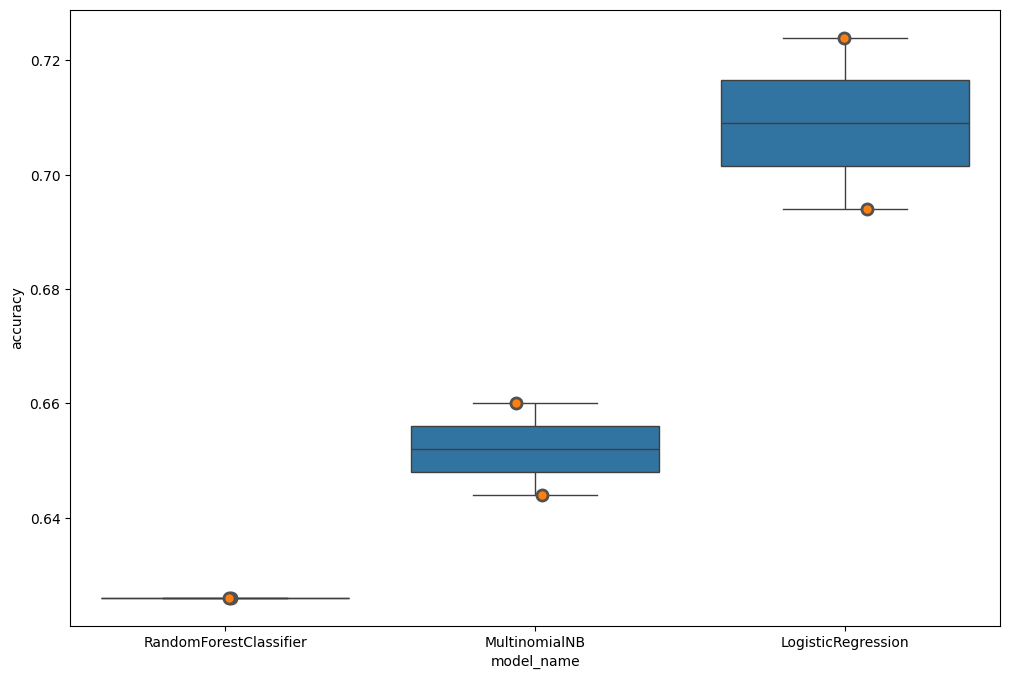

In [79]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

**Mean of Accuracy**

In [80]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.709
MultinomialNB             0.652
RandomForestClassifier    0.626
Name: accuracy, dtype: float64

**Final Modelling with Logistics Regression**

In [81]:
#first we split the data into testing and training
from sklearn.model_selection import train_test_split

model = LogisticRegression()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.15, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Confusion Matrix**

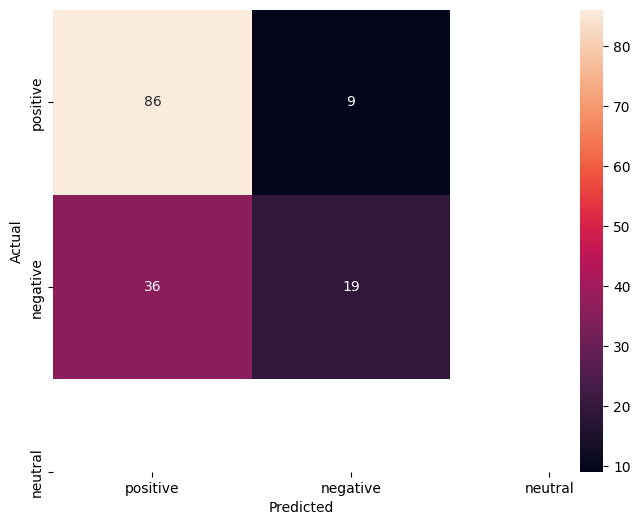

In [82]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Making Predictions using IPython.display Package**

In [83]:
from IPython.display import display

for predicted in range(conf_mat.shape[1]):
  for actual in range(conf_mat.shape[0]):
    if predicted != actual and conf_mat[actual, predicted] >= 0:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['label', 'reviews']])
      print('')

      #from IPython.display import display

#for predicted in category_id_df.category_id:
  #for actual in category_id_df.category_id:
    #if predicted != actual and conf_mat[actual, predicted] >= 0:
      #print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      #display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['label', 'reviews']])
      #print('')

'negative' predicted as 'positive' : 36 examples.


,label,reviews
993,negative,lima gatwick helpful courteous cabin crew the ...
971,negative,not verified newcastle delhi via london at che...
306,negative,not verified ba changed prepaid seats last min...
496,negative,ba says tickets flexible cancellation free wit...
558,negative,for ba got wrong hours delay food voucher poun...
578,negative,not verified on arrival warsaw airport check z...
14,negative,it almost pm supposed take still sitting plane...
31,negative,the entire booking ticketing experience stress...
310,negative,i horrified extremely small seats poor trainin...
230,negative,my luggage mis tagged dallas way cairo via lon...



'positive' predicted as 'negative' : 9 examples.


,label,reviews
553,positive,there mistake booking made ba got email say co...
262,positive,not verified top ten reasons use british airwa...
196,positive,they lost baggage simple situation it s three ...
926,positive,nice kuwait via london my flight nice delayed ...
601,positive,after h queuing check in desk i told booked se...
261,positive,worst seats i ever encountered economy class n...
456,positive,not verified flight delayed slightly due lugga...
122,positive,not verified angry disappointed unsatisfied my...
395,positive,this worst experience i ever airline i flew br...


In [84]:
model.fit(features, labels)

LogisticRegression()

Obtaining Unigrams and Bigrams again

In [85]:
N = 2
for Reason, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Reason))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'negative':
  . Top unigrams:
       . worst
       . terrible
  . Top bigrams:
       . business class
       . flight delayed
# 'neutral':
  . Top unigrams:
       . luggage
       . require
  . Top bigrams:
       . verified flight
       . hand luggage
# 'positive':
  . Top unigrams:
       . good
       . comfortable
  . Top bigrams:
       . london heathrow
       . cabin crew


**Predictions**

In [86]:
texts = ["a very full flight made premium economy feel a little less premium than you should expect for the price however the smaller cabin configuration and slightly roomier seating made the journey relaxing enough catering was pretty good and the inflight service was efficient and friendly arrived on time and no delays with baggage delivery no complaints as pe served it s function for the relatively short hr flight i am surprised to be able to give a favourable review of the flight european business cla",
         "flight delayed an hour due to bad weather around jfk however this was made up during the flight only to be delayed again by weather over lhr spending an extra hour in the american ba lounge at jfk was not ideal cold environment cold staff indifferent to the travellers needs one area was exceptionally dirty with plates on the tables and napkins strewn on the floor waited for a drink as no one to serve played a game of find the chips crisps which were hidden on a table in a dark corner in one of"]

In [87]:
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"a very full flight made premium economy feel a little less premium than you should expect for the price however the smaller cabin configuration and slightly roomier seating made the journey relaxing enough catering was pretty good and the inflight service was efficient and friendly arrived on time and no delays with baggage delivery no complaints as pe served it s function for the relatively short hr flight i am surprised to be able to give a favourable review of the flight european business cla"
  - Predicted as: 'positive'

"flight delayed an hour due to bad weather around jfk however this was made up during the flight only to be delayed again by weather over lhr spending an extra hour in the american ba lounge at jfk was not ideal cold environment cold staff indifferent to the travellers needs one area was exceptionally dirty with plates on the tables and napkins strewn on the floor waited for a drink as no one to serve played a game of find the chips crisps which were hidden on a 

**Classification Report**

In [88]:
from sklearn import metrics

In [89]:
print(metrics.classification_report(y_test, y_pred, labels=[0,1, 2, 3,4,5,6,7,8], target_names=df_labelled['label'].unique()))

              precision    recall  f1-score   support

    positive       0.70      0.91      0.79        95
    negative       0.68      0.35      0.46        55
     neutral       0.00      0.00      0.00         0

   micro avg       0.70      0.70      0.70       150
   macro avg       0.15      0.14      0.14       150
weighted avg       0.70      0.70      0.67       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 9, does not match size of target_names, 3
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisio

**Glove Modelling**

Cause our data is text data, it has to be converted into numerical form since that’s what the deep learning model expects. To convert sentences into numerical representations we use Tokenizer, which removes punctuation marks and special characters and converts the sentence to lowercase letter.

In [90]:
df_labelled

,reviews,label,category_id
0,four pleasant time flights friendly helpful st...,positive,0
1,not verified we travel extensively years tend ...,positive,0
2,flight delayed hour due bad weather around jfk...,negative,1
3,a full flight made premium economy feel little...,positive,0
4,the worst airline i ve ever flown could check ...,negative,1
...,...,...,...
995,i seated right next galley lavatory aisle duri...,positive,0
996,flight ok minor delay me what astonishing wait...,positive,0
997,gatwick barbados return i normally travel ba l...,positive,0
998,marseille london i generally annoyed quality s...,positive,0


In [91]:
X = df_labelled['reviews']
y = df_labelled['category_id']

X_train_sentences, X_test_sentences, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [92]:
vocab_size = 2000
embedding_dim = 16
max_len = 100
trunction_type='post'
padding_type='post'
oov_token = "<OOV>"

In [93]:
tokenize = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenize.fit_on_texts(X_train_sentences)

Word index show us how words are mapped into numbers

In [94]:
word_index = tokenize.word_index

By use texts_to_sequences from the tokenizer we convert the words into sequences so that a complete sequence of numbers can represent every sentence.

In [95]:
X_train = tokenize.texts_to_sequences(X_train_sentences)
X_test = tokenize.texts_to_sequences(X_test_sentences)

In [96]:

X_train_pad = pad_sequences(X_train,maxlen=max_len, padding=padding_type,
                            truncating=trunction_type)

X_test_pad = pad_sequences(X_test,maxlen=max_len, padding=padding_type,
                           truncating=trunction_type)

**Glove Embeddings**


In [97]:
#We use pre-trained word embeddings to create own embedding layer. We loading the Glove embeddings and append them to a dictionary.
#Next we use this dictionary to create an embedding matrix for each word in the training set.


In [98]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2024-06-22 15:32:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-22 15:32:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-22 15:32:50--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [99]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [100]:
!ls
!pwd

df.csv		   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
/content


In [101]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    try:
       coefs = np.asarray(values[1:], dtype='float32')
       embeddings_index[word] = coefs
    except ValueError:
       pass
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [102]:
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, max_len))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

**Deep Learning Model**

We create a model using embedding layer and Bidirectional LSTM layers. Bidirectional LSTMs are supported in Keras via the Bidirectional layer wrapper and it takes a recurrent layer (e.g. the first LSTM layer) as an argument.

In [103]:
#we create embedding layer
embedding_layer = Embedding(num_words,
                            max_len,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)

In [104]:
model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(embedding_dim, return_sequences=True)),
    Bidirectional(LSTM(embedding_dim)),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          662300    
                                                                 
 bidirectional (Bidirection  (None, 100, 32)           14976     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                6272      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 683753 (2.61 MB)
Trainable params: 21453 (

In [105]:
#training 10 epochs
history = model.fit(X_train_pad, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test),
                    verbose=1)

Epoch 1/10
25/25 [==============================] - 14s 270ms/step - loss: 0.6886 - accuracy: 0.5688 - val_loss: 0.6594 - val_accuracy: 0.6500
Epoch 2/10
25/25 [==============================] - 5s 182ms/step - loss: 0.6697 - accuracy: 0.6200 - val_loss: 0.6479 - val_accuracy: 0.6500
Epoch 3/10
25/25 [==============================] - 4s 165ms/step - loss: 0.6565 - accuracy: 0.6250 - val_loss: 0.6256 - val_accuracy: 0.6500
Epoch 4/10
25/25 [==============================] - 3s 111ms/step - loss: 0.5948 - accuracy: 0.6862 - val_loss: 0.5464 - val_accuracy: 0.7100
Epoch 5/10
25/25 [==============================] - 2s 91ms/step - loss: 0.5290 - accuracy: 0.7113 - val_loss: 0.6680 - val_accuracy: 0.5700
Epoch 6/10
25/25 [==============================] - 2s 85ms/step - loss: 0.4952 - accuracy: 0.7462 - val_loss: 0.5519 - val_accuracy: 0.7000
Epoch 7/10
25/25 [==============================] - 2s 86ms/step - loss: 0.4851 - accuracy: 0.7425 - val_loss: 0.4891 - val_accuracy: 0.7900
Epoch 8/

In [106]:
#Predictions on a test set:

loss, accuracy = model.evaluate(X_test_pad,y_test)
print('Test accuracy :', accuracy)

7/7 [==============================] - 0s 51ms/step - loss: 0.5339 - accuracy: 0.7350
Test accuracy : 0.7350000143051147


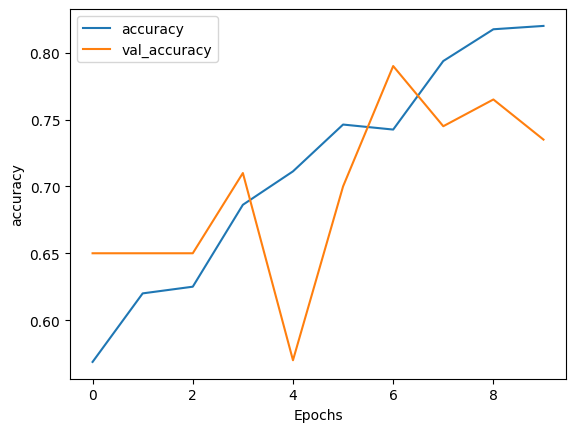

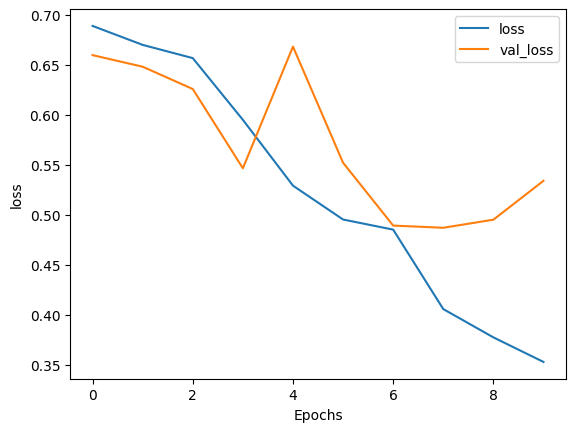

In [107]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Unseen Reviews
We can use our trained LSTM model for sentiment analysis to determine the sentiment of new unseen  reviews that are not present in the dataset. Before feeding each new text as input to the model, you must tokenize and pad it. The model.predict() function returns the probability of the positive review. If the probability is more significant than 0.5, we consider the study positive; otherwise, it is negative.